In [36]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

### 1.  Download Data

In [6]:
df_car_train =pd.read_csv('training.csv',index_col='RefId')

#### Download Test Data

In [10]:
df_car_test =pd.read_csv('test.csv',index_col='RefId')

#### Create list for feature names

In [21]:
feature_names= df_car_train.columns[1:]
print('Feature Names- \n ',feature_names)
print('#Features- \n',len(feature_names))

Feature Names 
  Index(['PurchDate', 'Auction', 'VehYear', 'VehicleAge', 'Make', 'Model',
       'Trim', 'SubModel', 'Color', 'Transmission', 'WheelTypeID', 'WheelType',
       'VehOdo', 'Nationality', 'Size', 'TopThreeAmericanName',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'PRIMEUNIT', 'AUCGUART', 'BYRNO', 'VNZIP1', 'VNST', 'VehBCost',
       'IsOnlineSale', 'WarrantyCost'],
      dtype='object')
#Features 
 32


#### Create list for Label

In [22]:
label_name= df_car_train.columns[0]
print('Label Name-',label_name)

Label Name  IsBadBuy


In [31]:
#### Create Separate Datset for Feature

In [32]:
df_car_train_features=df_car_train[feature_names]
df_car_test_features=df_car_test[feature_names]

### 2. Exploratory Data Analysis

#### a) Basic information on the Dataset

In [33]:
df_car_train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72983 entries, 1 to 73014
Data columns (total 32 columns):
PurchDate                            72983 non-null object
Auction                              72983 non-null object
VehYear                              72983 non-null int64
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Trim                                 70623 non-null object
SubModel                             72975 non-null object
Color                                72975 non-null object
Transmission                         72974 non-null object
WheelTypeID                          69814 non-null float64
WheelType                            69809 non-null object
VehOdo                               72983 non-null int64
Nationality                          72978 non-null object
Size                                 72978 non-null object
TopThree

#### Analysis - 

1. Number of Records in Training Data Set - 72983 
2. features -32
3. one class Lable - isBadbuy
4. Features -float64(10), int64(7), object(15)

#### b) Check for missing/Null Values

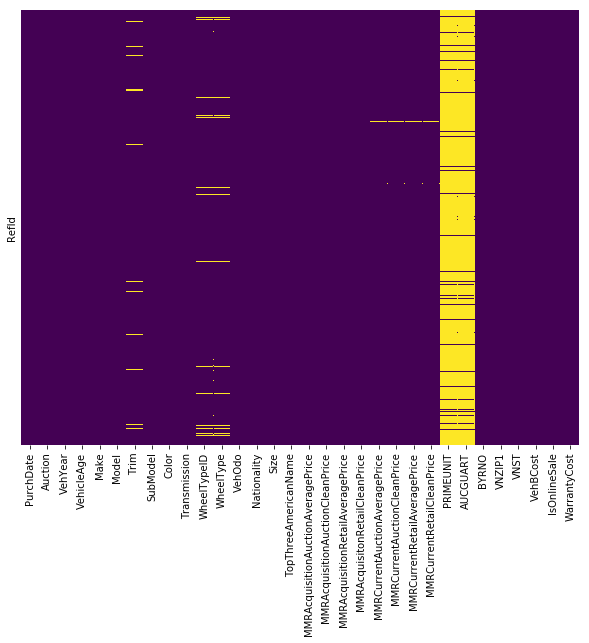

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(df_car_train_features.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Analysis -
1. Missing Values for the column -Trim ,WheelTypeiD,WheelType,
2. AUCGUART ,PRIMEUNIT    - 95% values are missing for these two columns 
3. Trim ,WheelTypeiD,WheelType - Values are missing but are not of high percentage. We can apply some techniques to impute value for these columns.

#### c) Check for correlated features

In [39]:
df_car_train_features_encoded= df_car_train_features.copy()
encode = {}
for column in df_car_train_features_encoded.columns:
        if df_car_train_features_encoded.dtypes[column] == np.object:
            encode[column] = LabelEncoder()
            df_car_train_features_encoded[column] = encode[column].fit_transform(df_car_train_features_encoded[column].astype(str))

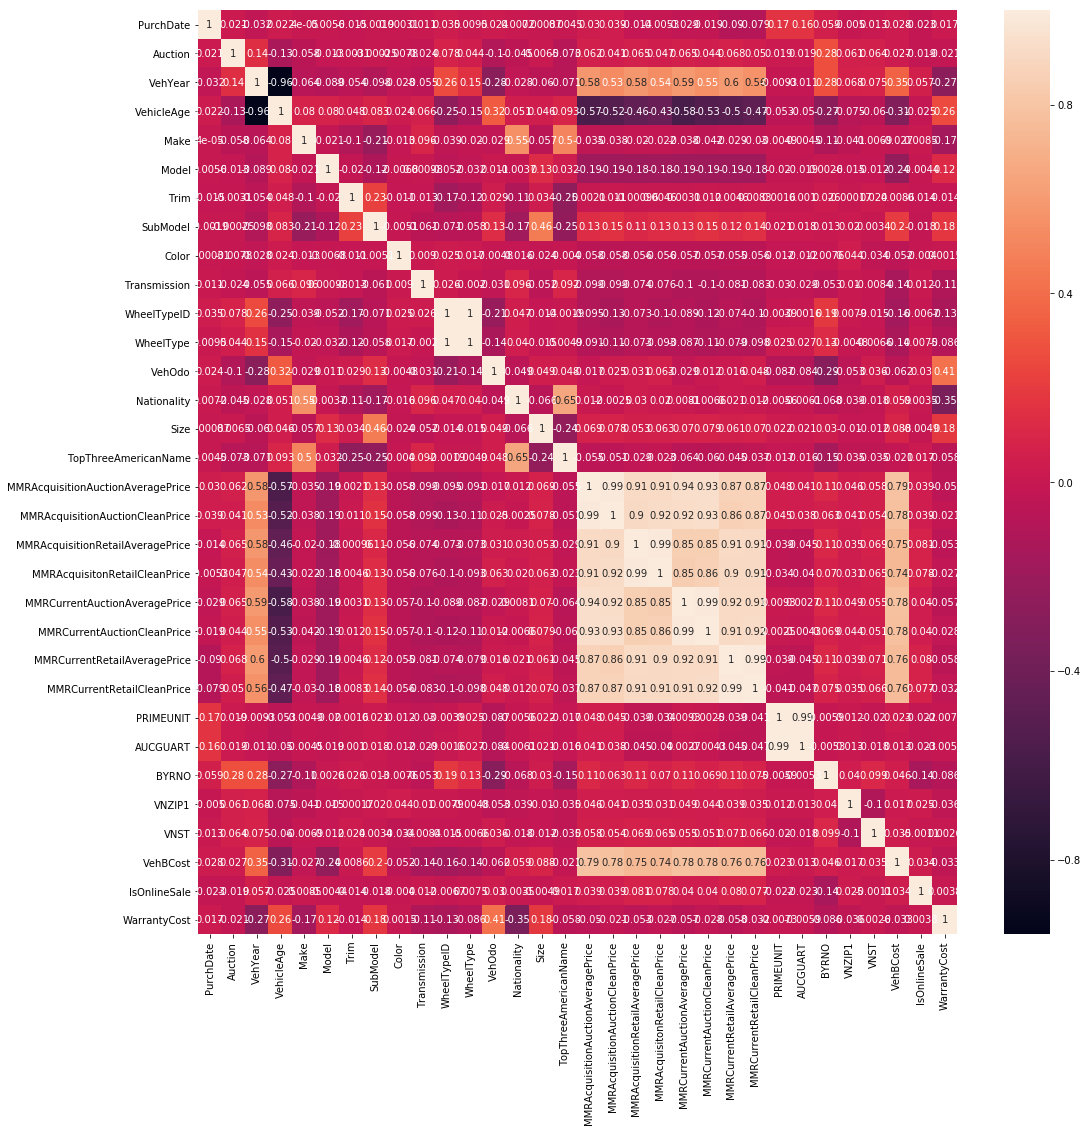

In [49]:
plt.figure(figsize=(17,17))
sns.heatmap(df_car_train_features_encoded.corr(),annot=True)

,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
IsBadBuy,,,,,,,,,,,,,,,,,,,,,
0,64007,64007,64007,64007,64007,64007,62021,64000,64000,63999,...,63724,63724,3286,3286,64007,64007,64007,64007,64007,64007
1,8976,8976,8976,8976,8976,8976,8602,8975,8975,8975,...,8944,8944,133,133,8976,8976,8976,8976,8976,8976


### 3. Data Transformation and Preprocessing

#### a) Drop AUCGUART ,PRIMEUNIT 


#### b)Impute Values for Trim ,WheelTypeiD,WheelType 

### 4. Balance the Data

### 5. Build Model

### 6. Train Model

### 7. Predict Test Data

### 8. Accuracy Report